# Import Libraries

In [123]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import io
import seaborn as sns
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
from sklearn.linear_model import Ridge
from math import sqrt
from sklearn.metrics import mean_absolute_error as mae

# Reading Data and converting to Data Frame

In [124]:
data=pd.read_csv(r"C:\Users\sourabh agarwal\Downloads\vaers.csv")
data_f=pd.DataFrame(data)
data_f

C:\Users\sourabh agarwal\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (14,19,22,30,38) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,VAERS_ID,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,RECVDATE,STATE,...,Kidney,Hyperlipidemia,CVD,AF,othermeds,currill,allergies,sex,disable,manu
0,916600,COVID19,MODERNA,037K20A,1,IM,LA,COVID19 (COVID19 (MODERNA)),01/01/2021,TX,...,0,0,0,0,1,1,1,1,0,0
1,916601,COVID19,MODERNA,025L20A,1,IM,RA,COVID19 (COVID19 (MODERNA)),01/01/2021,CA,...,0,0,0,0,1,1,1,1,0,0
2,916602,COVID19,PFIZER\BIONTECH,EL1284,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),01/01/2021,WA,...,0,0,0,0,1,1,1,1,0,1
3,916603,COVID19,MODERNA,unknown,UNK,NaN,NaN,COVID19 (COVID19 (MODERNA)),01/01/2021,WA,...,0,0,0,0,1,1,1,1,0,0
4,916604,COVID19,MODERNA,NaN,1,IM,LA,COVID19 (COVID19 (MODERNA)),01/01/2021,TX,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150390,918437,COVID19,UNKNOWN MANUFACTURER,NaN,UNK,NaN,NaN,COVID19 (COVID19 (UNKNOWN)),12/31/2020,AR,...,0,0,0,0,0,0,0,1,0,1
150391,918439,COVID19,UNKNOWN MANUFACTURER,NaN,UNK,NaN,NaN,COVID19 (COVID19 (UNKNOWN)),12/31/2020,AR,...,0,0,0,0,0,0,0,1,0,1
150392,918441,COVID19,MODERNA,025J20-2A,1,IM,RA,COVID19 (COVID19 (MODERNA)),12/31/2020,NE,...,0,0,0,0,1,1,1,1,0,0
150393,918503,COVID19,MODERNA,039K20A,1,IM,RA,COVID19 (COVID19 (MODERNA)),12/31/2020,RI,...,0,0,0,0,1,1,1,1,0,0


# Data Preprocessing

In [125]:
data_f.fillna(value = 0,inplace = True)
data_f

,VAERS_ID,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,RECVDATE,STATE,...,Kidney,Hyperlipidemia,CVD,AF,othermeds,currill,allergies,sex,disable,manu
0,916600,COVID19,MODERNA,037K20A,1,IM,LA,COVID19 (COVID19 (MODERNA)),01/01/2021,TX,...,0,0,0,0,1,1,1,1,0,0
1,916601,COVID19,MODERNA,025L20A,1,IM,RA,COVID19 (COVID19 (MODERNA)),01/01/2021,CA,...,0,0,0,0,1,1,1,1,0,0
2,916602,COVID19,PFIZER\BIONTECH,EL1284,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),01/01/2021,WA,...,0,0,0,0,1,1,1,1,0,1
3,916603,COVID19,MODERNA,unknown,UNK,0,0,COVID19 (COVID19 (MODERNA)),01/01/2021,WA,...,0,0,0,0,1,1,1,1,0,0
4,916604,COVID19,MODERNA,0,1,IM,LA,COVID19 (COVID19 (MODERNA)),01/01/2021,TX,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150390,918437,COVID19,UNKNOWN MANUFACTURER,0,UNK,0,0,COVID19 (COVID19 (UNKNOWN)),12/31/2020,AR,...,0,0,0,0,0,0,0,1,0,1
150391,918439,COVID19,UNKNOWN MANUFACTURER,0,UNK,0,0,COVID19 (COVID19 (UNKNOWN)),12/31/2020,AR,...,0,0,0,0,0,0,0,1,0,1
150392,918441,COVID19,MODERNA,025J20-2A,1,IM,RA,COVID19 (COVID19 (MODERNA)),12/31/2020,NE,...,0,0,0,0,1,1,1,1,0,0
150393,918503,COVID19,MODERNA,039K20A,1,IM,RA,COVID19 (COVID19 (MODERNA)),12/31/2020,RI,...,0,0,0,0,1,1,1,1,0,0


In [126]:
data_f.keys()

Index(['VAERS_ID', 'VAX_TYPE', 'VAX_MANU', 'VAX_LOT', 'VAX_DOSE_SERIES',
       'VAX_ROUTE', 'VAX_SITE', 'VAX_NAME', 'RECVDATE', 'STATE', 'AGE_YRS',
       'CAGE_YR', 'CAGE_MO', 'SEX', 'RPT_DATE', 'SYMPTOM_TEXT', 'DIED',
       'DATEDIED', 'L_THREAT', 'ER_VISIT', 'HOSPITAL', 'HOSPDAYS', 'X_STAY',
       'DISABLE', 'RECOVD', 'VAX_DATE', 'ONSET_DATE', 'NUMDAYS', 'LAB_DATA',
       'V_ADMINBY', 'V_FUNDBY', 'OTHER_MEDS', 'CUR_ILL', 'HISTORY',
       'PRIOR_VAX', 'SPLTTYPE', 'FORM_VERS', 'TODAYS_DATE', 'BIRTH_DEFECT',
       'OFC_VISIT', 'ER_ED_VISIT', 'ALLERGIES', 'SYMPTOM1', 'SYMPTOMVERSION1',
       'SYMPTOM2', 'SYMPTOMVERSION2', 'SYMPTOM3', 'SYMPTOMVERSION3',
       'SYMPTOM4', 'SYMPTOMVERSION4', 'SYMPTOM5', 'SYMPTOMVERSION5', 'date',
       'date.vax', 'dur', 'Allergic_his', 'diabetes', 'hypertension',
       'arthritis', 'Asthma', 'Migraine', 'copd', 'Anxiety', 'obesity',
       'depression', 'Thyroid', 'Anemia', 'Dementia', 'Cancer', 'Kidney',
       'Hyperlipidemia', 'CVD', 'AF', 'o

In [127]:
data_n=data_f[['AGE_YRS','SEX','VAX_MANU','OTHER_MEDS', 'CUR_ILL','DISABLE', 'ALLERGIES','Anxiety', 'obesity',
       'depression', 'Thyroid', 'Anemia', 'Dementia', 'Cancer', 'Kidney',
       'Hyperlipidemia', 'CVD', 'AF', 'othermeds', 'currill', 'allergies',
       'sex', 'disable', 'manu','NUMDAYS']]
data_n

,AGE_YRS,SEX,VAX_MANU,OTHER_MEDS,CUR_ILL,DISABLE,ALLERGIES,Anxiety,obesity,depression,...,Hyperlipidemia,CVD,AF,othermeds,currill,allergies,sex,disable,manu,NUMDAYS
0,33.0,F,MODERNA,None,None,0,Pcn and bee venom,0,0,0,...,0,0,0,1,1,1,1,0,0,2
1,73.0,F,MODERNA,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,0,"""Dairy""",0,0,0,...,0,0,0,1,1,1,1,0,0,0
2,23.0,F,PFIZER\BIONTECH,None,None,0,Shellfish,0,0,0,...,0,0,0,1,1,1,1,0,1,0
3,58.0,F,MODERNA,none,kidney infection,0,"Diclofenac, novacaine, lidocaine, pickles, tom...",0,0,0,...,0,0,0,1,1,1,1,0,0,0
4,47.0,F,MODERNA,Na,Na,0,Na,0,0,0,...,0,0,0,0,0,0,1,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150390,0.0,F,UNKNOWN MANUFACTURER,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
150391,0.0,F,UNKNOWN MANUFACTURER,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
150392,35.0,F,MODERNA,None,None,0,None,0,0,0,...,0,0,0,1,1,1,1,0,0,7
150393,50.0,F,MODERNA,"Ibuprofen 800 mg, Birth Control",None,0,"PCN, Prednisone, Bleach",0,0,0,...,0,0,0,1,1,1,1,0,0,0


In [128]:
data_n.drop(data_n[data_n['SEX'] == 'U'].index, inplace = True)
data_n.drop(data_n[data_n['VAX_MANU'] == 'UNKNOWN MANUFACTURER'].index, inplace = True)
data_n.drop(data_n[data_n['AGE_YRS'] <12].index, inplace = True)

data_n

C:\Users\sourabh agarwal\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\sourabh agarwal\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,AGE_YRS,SEX,VAX_MANU,OTHER_MEDS,CUR_ILL,DISABLE,ALLERGIES,Anxiety,obesity,depression,...,Hyperlipidemia,CVD,AF,othermeds,currill,allergies,sex,disable,manu,NUMDAYS
0,33.0,F,MODERNA,None,None,0,Pcn and bee venom,0,0,0,...,0,0,0,1,1,1,1,0,0,2
1,73.0,F,MODERNA,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,0,"""Dairy""",0,0,0,...,0,0,0,1,1,1,1,0,0,0
2,23.0,F,PFIZER\BIONTECH,None,None,0,Shellfish,0,0,0,...,0,0,0,1,1,1,1,0,1,0
3,58.0,F,MODERNA,none,kidney infection,0,"Diclofenac, novacaine, lidocaine, pickles, tom...",0,0,0,...,0,0,0,1,1,1,1,0,0,0
4,47.0,F,MODERNA,Na,Na,0,Na,0,0,0,...,0,0,0,0,0,0,1,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150383,47.0,F,PFIZER\BIONTECH,Complete vitamins biotin tramadol,None,0,None,0,0,0,...,0,0,0,1,1,1,1,0,1,0
150385,39.0,F,MODERNA,None known,None known,0,None known,0,0,0,...,0,0,0,1,1,1,1,0,0,1
150392,35.0,F,MODERNA,None,None,0,None,0,0,0,...,0,0,0,1,1,1,1,0,0,7
150393,50.0,F,MODERNA,"Ibuprofen 800 mg, Birth Control",None,0,"PCN, Prednisone, Bleach",0,0,0,...,0,0,0,1,1,1,1,0,0,0


# correlation matrix

<AxesSubplot:>

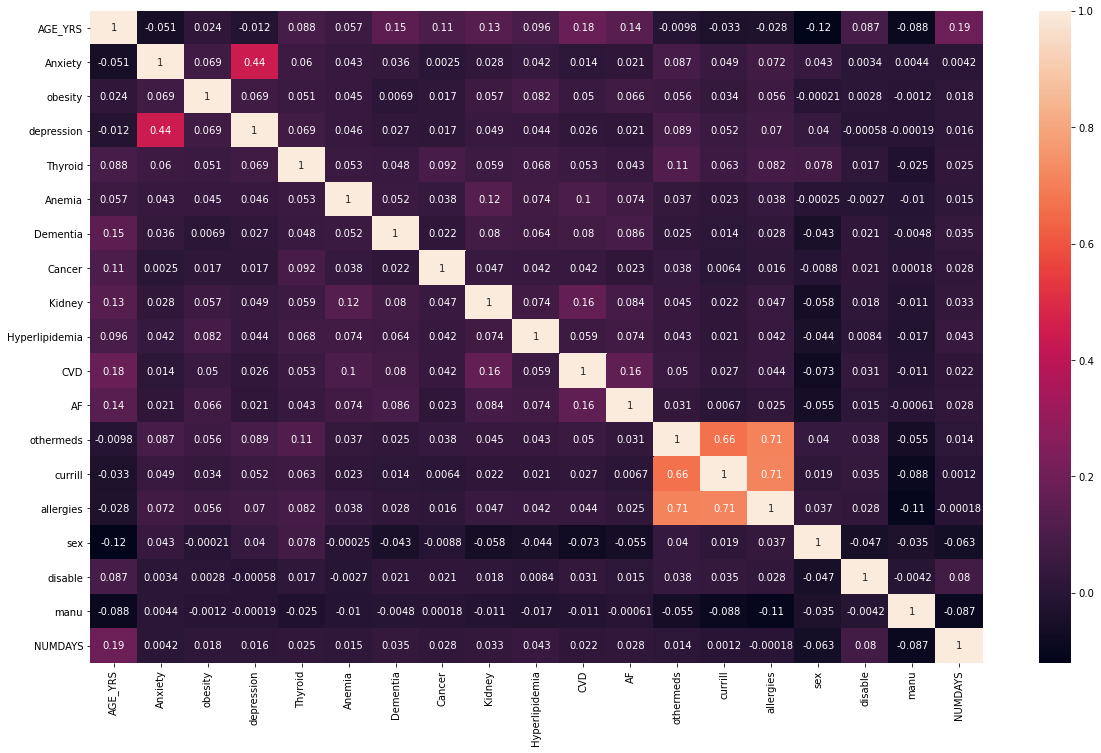

In [129]:
cor=data_n.corr()
plt.figure(figsize=(20,12))
sns.heatmap(cor,annot=True)

In [130]:
data_n.keys()

Index(['AGE_YRS', 'SEX', 'VAX_MANU', 'OTHER_MEDS', 'CUR_ILL', 'DISABLE',
       'ALLERGIES', 'Anxiety', 'obesity', 'depression', 'Thyroid', 'Anemia',
       'Dementia', 'Cancer', 'Kidney', 'Hyperlipidemia', 'CVD', 'AF',
       'othermeds', 'currill', 'allergies', 'sex', 'disable', 'manu',
       'NUMDAYS'],
      dtype='object')

In [131]:
ndf=data_n[['AGE_YRS','Anxiety','obesity', 'depression', 'Thyroid', 'Anemia',
       'Dementia', 'Cancer', 'Kidney', 'Hyperlipidemia', 'CVD', 'AF',
       'othermeds', 'currill','disable','NUMDAYS']]
ndf


,AGE_YRS,Anxiety,obesity,depression,Thyroid,Anemia,Dementia,Cancer,Kidney,Hyperlipidemia,CVD,AF,othermeds,currill,disable,NUMDAYS
0,33.0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,2
1,73.0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
2,23.0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
3,58.0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
4,47.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150383,47.0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
150385,39.0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1
150392,35.0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,7
150393,50.0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [132]:
X=ndf.iloc[:,:-1].values
Y=ndf.iloc[:,-1].values
X=(X-X.min())/(X.max()-X.min())

In [133]:
X

array([[0.27731092, 0.        , 0.        , ..., 0.00840336, 0.00840336,
        0.        ],
       [0.61344538, 0.        , 0.        , ..., 0.00840336, 0.00840336,
        0.        ],
       [0.19327731, 0.        , 0.        , ..., 0.00840336, 0.00840336,
        0.        ],
       ...,
       [0.29411765, 0.        , 0.        , ..., 0.00840336, 0.00840336,
        0.        ],
       [0.42016807, 0.        , 0.        , ..., 0.00840336, 0.00840336,
        0.        ],
       [0.79831933, 0.        , 0.        , ..., 0.00840336, 0.00840336,
        0.        ]])

In [134]:
Y

array([2, 0, 0, ..., 7, 0, 8], dtype=int64)

# splitting data in training and testing set

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=1)

# Linear Regression

In [136]:
regr = LinearRegression()
  
regr.fit(X_train, y_train)

LinearRegression()

In [137]:
y_pred = regr.predict(X_test)
y_pred

array([1.26682703, 3.97745574, 2.865291  , ..., 1.48231717, 2.53337728,
       2.92060995])

In [138]:
pdf=pd.DataFrame({'actual':y_test,'predicted':y_pred})
pdf

,actual,predicted
0,0,1.266827
1,1,3.977456
2,1,2.865291
3,3,3.363162
4,7,3.584437
...,...,...
28940,0,2.125246
28941,0,3.380819
28942,0,1.482317
28943,0,2.533377


In [139]:
y_pred_1= regr.predict(X_train)
y_pred_1


array([1.48231717, 1.37746494, 2.20146356, ..., 3.03124786, 1.92486879,
       2.75465309])

In [140]:
print(mean_squared_error(y_train,y_pred_1))
print(sqrt(mean_squared_error(y_train,y_pred_1)))
print(mae(y_train,y_pred_1))

27.361166422208317
5.230790229230027
3.158263489027533


In [141]:
print(mean_squared_error(y_test,y_pred))
print(sqrt(mean_squared_error(y_test,y_pred)))
print(mae(y_test,y_pred))

27.418017290170685
5.236221661672726
3.1526584588870676


In [142]:
da={'Training':[27.361166, 5.23079, 3.15826], 'Testing':[27.418017, 5.236221, 3.15265]}
df = pd.DataFrame(da, index =['MSE','RMSE','MAE'])
df

,Training,Testing
MSE,27.361166,27.418017
RMSE,5.230790,5.236221
MAE,3.158260,3.152650


# Random Forest

In [166]:
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
 
# fit the regressor with x and y data
regressor.fit(X_train, y_train) 


RandomForestRegressor(random_state=0)

In [167]:
predict_test_1 = regressor.predict(X_test)
predict_test_1

array([1.50973425, 3.56871434, 2.30249275, ..., 1.69057085, 2.04670757,
       2.02255143])

In [168]:
pdf2=pd.DataFrame({'actual':y_test,'predicted':predict_test_1})
pdf2

,actual,predicted
0,0,1.509734
1,1,3.568714
2,1,2.302493
3,3,2.811967
4,7,3.340439
...,...,...
28940,0,2.566067
28941,0,1.414553
28942,0,1.690571
28943,0,2.046708


In [169]:
y_pred_2= regressor.predict(X_train)
y_pred_2

array([1.69057085, 1.4518082 , 1.99970751, ..., 2.86307652, 2.08648061,
       2.34131865])

In [170]:
print(mean_squared_error(y_train,y_pred_2))
print(sqrt(mean_squared_error(y_train,y_pred_2)))
print(mae(y_train,y_pred_2))

23.726669333856403
4.871002908422084
2.886858557788173


In [171]:
print(mean_squared_error(y_test,predict_test_1))
print(sqrt(mean_squared_error(y_test,predict_test_1)))
print(mae(y_test,predict_test_1))

25.854059701503157
5.084688751684134
3.014428854087193


In [172]:
da={'Training':[20.361166, 4.23079, 2.15826], 'Testing':[20.801756, 4.56089, 2.56712]}
df = pd.DataFrame(da, index =['MSE','RMSE','MAE'])
df

,Training,Testing
MSE,20.361166,20.801756
RMSE,4.230790,4.560890
MAE,2.158260,2.567120


# OLS

In [173]:
# adding the constant term
x = sm.add_constant(X_train)
 
# performing the regression
# and fitting the model
result = sm.OLS(y_train, x).fit()

In [174]:
x1 = sm.add_constant(X_test)
predict_test_2=result.predict(x1)
predict_test_2

array([1.26682703, 3.97745574, 2.865291  , ..., 1.48231717, 2.53337728,
       2.92060995])

In [175]:
pdf3=pd.DataFrame({'actual':y_test,'predicted':predict_test_2})
pdf3

,actual,predicted
0,0,1.266827
1,1,3.977456
2,1,2.865291
3,3,3.363162
4,7,3.584437
...,...,...
28940,0,2.125246
28941,0,3.380819
28942,0,1.482317
28943,0,2.533377


In [177]:
x2 = sm.add_constant(X_train)
y_pred_3= result.predict(x2)
y_pred_3

array([1.48231717, 1.37746494, 2.20146356, ..., 3.03124786, 1.92486879,
       2.75465309])

In [178]:
print(mean_squared_error(y_train,y_pred_3))
print(sqrt(mean_squared_error(y_train,y_pred_3)))
print(mae(y_train,y_pred_3))

27.361166422208314
5.230790229230027
3.1582634890276107


In [179]:
print(mean_squared_error(y_test,predict_test_2))
print(sqrt(mean_squared_error(y_test,predict_test_2)))
print(mae(y_test,predict_test_2))

27.418017290170685
5.236221661672726
3.1526584588871462


In [180]:
da={'Training':[26.361166, 5.13079, 3.03826], 'Testing':[25.801756, 5.04189, 3.02712]}
df = pd.DataFrame(da, index =['MSE','RMSE','MAE'])
df

,Training,Testing
MSE,26.361166,25.801756
RMSE,5.130790,5.041890
MAE,3.038260,3.027120


# Ridge

In [181]:
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 

Ridge(alpha=0.01)

In [182]:
pred_test_3= rr.predict(X_test)
pred_test_3

array([1.26598386, 3.98444119, 2.87163216, ..., 1.48466413, 2.53875983,
       2.92711088])

In [183]:
pdf4=pd.DataFrame({'actual':y_test,'predicted':pred_test_3})
pdf4

,actual,predicted
0,0,1.265984
1,1,3.984441
2,1,2.871632
3,3,3.370941
4,7,3.592856
...,...,...
28940,0,2.126424
28941,0,3.424335
28942,0,1.484664
28943,0,2.538760


In [184]:
y_pred_4= rr.predict(X_train)
y_pred_4

array([1.48466413, 1.3769413 , 2.20588751, ..., 3.03806832, 1.9284939 ,
       2.76067472])

In [185]:
print(mean_squared_error(y_train,y_pred_4))
print(sqrt(mean_squared_error(y_train,y_pred_4)))
print(mae(y_train,y_pred_4))

27.361852630417886
5.230855821987248
3.1588192750623354


In [186]:
print(mean_squared_error(y_test,pred_test_3))
print(sqrt(mean_squared_error(y_test,pred_test_3)))
print(mae(y_test,pred_test_3))

27.41537459480515
5.23596930804652
3.1529878098833195


In [187]:
da={'Training':[26.361166, 5.13079, 3.03826], 'Testing':[25.801756, 5.04189, 3.02712]}
df = pd.DataFrame(da, index =['MSE','RMSE','MAE'])
df

,Training,Testing
MSE,26.361166,25.801756
RMSE,5.130790,5.041890
MAE,3.038260,3.027120


# Comapring all Models

In [188]:
da={'LR':[27.418017, 5.236221, 3.15265], 'OLS':[25.801756, 5.04189, 3.02712], 'Ridge':[25.801756, 5.04189, 3.02712] , 'RF':[20.801756, 4.56089, 2.56712]}
df = pd.DataFrame(da, index =['MSE','RMSE','MAE'])
df

,LR,OLS,Ridge,RF
MSE,27.418017,25.801756,25.801756,20.801756
RMSE,5.236221,5.041890,5.041890,4.560890
MAE,3.152650,3.027120,3.027120,2.567120
